# Relatório - Trablaho A2 de Intrdução à Computação

#### Paulo César Gomes Rodrigues e Pedro Santos Tokar

Esse relatório visa explicar a implementação de cada função proposta para o trabalho, bem como apresentar os resultados obtidos, no nosso caso usando a base de dados da doença de Chagas em 2018. Primeiro, é preciso importar o módulo `a2.py`, que tem as funções implementadas, e a função `decodifica_idade_SINAN`, que é usada em uma das questões:

In [1]:
import a2
from pysus.preprocessing.decoders import decodifica_idade_SINAN

Algumas questões fazem uso de um dicionário relacionando os códigos dos estados com suas siglas. Esse dicionário está definido no começo do arquivo `a2.py`, e é o seguinte:

In [2]:
dicionario_estados = {
    12:"AC", 27:"AL", 16:"AP", 13:"AM", 29:"BA", 23:"CE", 53:"DF", 32:"ES",
    52:"GO", 21:"MA", 51:"MT", 50:"MS", 31:"MG", 15:"PA", 25:"PB", 41:"PR",
    26:"PE", 22:"PI", 24:"RN", 43:"RS", 33:"RJ", 11:"RO", 14:"RR", 42:"SC",
    35:"SP", 28:"SE", 17:"TO"
}

## Questão 1

Código:

In [3]:
def questao_1(caminho = "chagas2018.csv"):
    df = pd.read_csv(caminho)
    return df.shape[0]

a2.questao_1()

4685

Essa questão é bem simples: Ela não faz mais nada além de ler o arquivo de acordo como path fornecido (assim como todas as posteriores) e contar quantas linhas tem o dataframe, usando o atributo `shape`, que guarda o número de linhas e colunas do dataframe.

## Questão 2

Código:

In [4]:
def questao_2(caminho = "chagas2018.csv"):
    df = pd.read_csv(caminho)
    casos_por_municipio = df["ID_MUNICIP"].value_counts()
    return casos_por_municipio

a2.questao_2()

150010    521
160030    368
150140    332
150080    270
150130    263
         ... 
130410      1
221000      1
293330      1
231290      1
510795      1
Name: ID_MUNICIP, Length: 472, dtype: int64

A função acessa a coluna `ID_MUNICIP` (que é um objeto da classe `Series`, assim como todas as colunas do dataframe) no dataframe e usa o método `value_counts` nessa coluna. O método retorna um objeto `Series`, que é o resultado pedido da questão.

## Questão 3

Código:

In [5]:
def questao_3(caminho = "chagas2018.csv"):
    df = pd.read_csv(caminho)
    dicionario =  df["CS_SEXO"].value_counts().to_dict()
    if " " in dicionario.keys():
        del dicionario[" "]
    if "I" in dicionario.keys():
        del dicionario["I"]
    if not ("M" in dicionario.keys()):
        dicionario["M"] = 0
    if not ("F" in dicionario.keys()):
        dicionario["F"] = 0
    if dicionario["M"] > dicionario["F"]:
        return "M", dicionario
    elif dicionario["F"] > dicionario["M"]:
        return "F", dicionario
    else:
        return "F", dicionario

a2.questao_3()

('M', {'M': 2420, 'F': 2265})

Essa função usa o método `value_counts` na coluna `CS_SEXO`, e usa o método `to_dict` para converter o objeto `Series` em um dicionário python. Após isso, as chaves `I` e ` ` são removidas dele, caso existam (algumas bases de dados do SINAN apresentam esses valores na coluna de sexo). Por último, é usada uma condicional para ver qual sexo tem mais casos, e o retorno é uma tupla com a letra representando o sexo e o dicionário com as ocorrências por sexo.

## Questão 4

Código:

In [6]:
def questao_4(caminho = "chagas2018.csv"):
    df = pd.read_csv(caminho)
    df["IDADE_DECODIFICADA"] = decodifica_idade_SINAN(df.NU_IDADE_N, "Y")
    media = df["IDADE_DECODIFICADA"].mean()
    return media

a2.questao_4()

31.9842255717509

Essa função usa a função `decodifica_idade_SINAN`, da biblioteca `PySUS`, para decodificar a coluna de idades do dataframe. Uma nova coluna com essas idades decodificadas é criada, e a média é calculada pelo método `mean`.

## Questão 5

Código:

In [7]:
def questao_5(caminho = "chagas2018.csv"):
    df = pd.read_csv(caminho)
    estados_com_sigla = df["SG_UF_NOT"].replace(dicionario_estados)
    contagem_por_estado = estados_com_sigla.value_counts().to_dict()
    for estado in dicionario_estados.values():
        if estado not in contagem_por_estado.keys():
            contagem_por_estado[estado] = 0
    return contagem_por_estado

a2.questao_5()

{'PA': 2618,
 'AP': 556,
 'MG': 271,
 'BA': 181,
 'MA': 174,
 'RO': 131,
 'TO': 119,
 'AM': 90,
 'AC': 84,
 'PB': 72,
 'ES': 58,
 'PR': 56,
 'MT': 41,
 'CE': 34,
 'RS': 29,
 'RJ': 27,
 'AL': 27,
 'GO': 22,
 'PI': 19,
 'SP': 19,
 'SC': 13,
 'PE': 12,
 'RN': 11,
 'MS': 7,
 'SE': 7,
 'DF': 4,
 'RR': 3}

Essa função usa o método `replace` na coluna `SG_UF_NOT` (que contém os códigos dos estados brasileiros), usando o dicionário `dicionario_estados` para converter os números para siglas (as outras questões que precisarem de estados também usarão esse método). Depois, o método `value_counts` é usado para contar quantos casos cada estado tem. As últimas linhas servem para adicionar os estados que não tem casos no dicionário, já que eles por padrão não apareceriam no resultado do método `value_counts`.

## Questão 6

Código:

In [8]:
def questao_6(caminho = "chagas2018.csv"):
    df = pd.read_csv(caminho)
    df["SG_UF_NOT"] = df["SG_UF_NOT"].replace(dicionario_estados)
    somente_homens = df[df["CS_SEXO"] == "M"]
    quant_por_estado = somente_homens["SG_UF_NOT"].value_counts().to_dict()
    for estado in dicionario_estados.values():
        if estado not in quant_por_estado.keys():
            quant_por_estado[estado] = 0
    return quant_por_estado

a2.questao_6()

{'PA': 1344,
 'AP': 308,
 'MG': 136,
 'BA': 85,
 'MA': 82,
 'RO': 78,
 'TO': 77,
 'AC': 47,
 'AM': 42,
 'PB': 36,
 'ES': 30,
 'PR': 29,
 'MT': 22,
 'RS': 16,
 'CE': 14,
 'RJ': 14,
 'AL': 11,
 'GO': 10,
 'SP': 10,
 'RN': 7,
 'SC': 5,
 'PI': 5,
 'MS': 3,
 'PE': 3,
 'RR': 3,
 'DF': 2,
 'SE': 1}

Essa questão faz a mesma coisa que a questão anterior, mas com um passo a mais. Ela faz as operações necessárias com um dataframe filtrado, o qual tem apenas casos registrados em homens. Esse filtro é feito usando uma simples condicional (`df["CS_SEXO"] == "M"`).

## Questão 7

Código:

In [9]:
def questao_7(caminho = "chagas2018.csv"):
    df = pd.read_csv(caminho)
    cidades_por_uf = {"AC":22, "AL":102, "AP":16, "AM":62, "BA":417, "CE":184,
                      "DF":1, "ES":78, "GO":246, "MA":217, "MT":141, "MS":79,
                      "MG":853, "PA":144, "PB":223, "PR":399, "PE":185,
                      "PI":224, "RN":167, "RS":497, "RJ":91, "RO":52, "RR":15,
                      "SC":295, "SP":645, "SE":75, "TO":139}
    proporcao_por_uf = dict()
    df["SG_UF_NOT"] = df["SG_UF_NOT"].replace(dicionario_estados)
    combinacoes = df.groupby(["SG_UF_NOT", "ID_MUNICIP"]).size().to_frame().reset_index()
    cidades_apareceram = combinacoes["SG_UF_NOT"].value_counts().to_dict()
    for estado in cidades_por_uf.keys():
        if estado in cidades_apareceram.keys():
            proporcao_por_uf[estado] = cidades_apareceram[estado]/cidades_por_uf[estado]
        else:
            proporcao_por_uf[estado] = 0.0
    return proporcao_por_uf

a2.questao_7()

{'AC': 0.09090909090909091,
 'AL': 0.12745098039215685,
 'AP': 0.125,
 'AM': 0.16129032258064516,
 'BA': 0.16786570743405277,
 'CE': 0.125,
 'DF': 1.0,
 'ES': 0.28205128205128205,
 'GO': 0.07723577235772358,
 'MA': 0.04608294930875576,
 'MT': 0.0851063829787234,
 'MS': 0.06329113924050633,
 'MG': 0.06213364595545135,
 'PA': 0.4791666666666667,
 'PB': 0.10762331838565023,
 'PR': 0.06516290726817042,
 'PE': 0.04864864864864865,
 'PI': 0.04017857142857143,
 'RN': 0.04790419161676647,
 'RS': 0.04225352112676056,
 'RJ': 0.16483516483516483,
 'RO': 0.25,
 'RR': 0.06666666666666667,
 'SC': 0.03728813559322034,
 'SP': 0.021705426356589147,
 'SE': 0.05333333333333334,
 'TO': 0.04316546762589928}

Essa função cria um dataframe `combinacoes` usando o método `groupby` para agrupar o dataframe original baseado nos estados e municípios e o método `size`, que mostra quantas vezes uma combinação de estado e município apareceu. O objetivo da criação desse dataframe é saber quantos municipios de cada estado aparecem no total. Após sua criação, é usado o método `value_counts` para a obtenção de um dicionário contendo quantas cidades de cada estado apareceram na base principal.

Por último, um dicionário com as proporções é feito (e retornado), fazendo uma divisão usando as contagens obtidas do dataframe e um dicionário pronto com a quantidade total de municípios por estado. Se não tiverem casos no estado, a chave é colocada com um valor `0.0`

## Questão 8

Código:

In [10]:
def questao_8(caminho = "chagas2018.csv"):
    df = pd.read_csv(caminho)
    df = df.astype({"DT_NOTIFIC": str, "DT_SIN_PRI": str}).copy() #Esse copy é para evitar um `PerformanceWarning`
    df["DT_NOTIFICACAO"] = pd.to_datetime(df["DT_NOTIFIC"])
    df["DT_SINTOMAS"] = pd.to_datetime(df["DT_SIN_PRI"])
    df["ATRASO_NOT"] = (df["DT_NOTIFICACAO"] - df["DT_SINTOMAS"]).dt.days
    return df[["DT_NOTIFICACAO", "DT_SINTOMAS", "ATRASO_NOT"]]

a2.questao_8()

,DT_NOTIFICACAO,DT_SINTOMAS,ATRASO_NOT
0,2018-12-19,2018-12-05,14
1,2018-11-30,2018-11-05,25
2,2018-10-03,2018-09-25,8
3,2018-01-09,2017-12-19,21
4,2018-08-11,2018-08-11,0
...,...,...,...
4680,2018-10-18,2018-10-10,8
4681,2018-02-21,2018-02-07,14
4682,2018-10-16,2018-04-17,182
4683,2018-09-11,2018-03-10,185


Na função, as colunas referentes as datas necessárias são convertidas para o formato `string`, para que a função `to_datetime` da biblioteca pandas possa converter essas colunas para o formato `datetime` corretamente (se elas estivessem em formato `int`, seriam interpretadas como segundos). Em seguida é criada uma coluna contendo a quantidade de dias de atraso para cada caso, fazendo uma operação de subtração com as duas outras colunas e usando o atributo `dt.days` do resultado para obter a quantidade de dias de diferença. O retorno é um dataframe com as três colunas pedidas na questão.

## Questão 9

Código

In [11]:
def questao_9(caminho = "chagas2018.csv"):
    df = pd.read_csv(caminho)
    medias_e_desvios = dict()
    df["SG_UF_NOT"] = df["SG_UF_NOT"].replace(dicionario_estados)
    df = df.astype({"DT_NOTIFIC": str, "DT_SIN_PRI": str}).copy()
    df["DT_NOTIFICACAO"] = pd.to_datetime(df["DT_NOTIFIC"])
    df["DT_SINTOMAS"] = pd.to_datetime(df["DT_SIN_PRI"])
    df["ATRASO_NOT"] = (df["DT_NOTIFICACAO"] - df["DT_SINTOMAS"]).dt.days
    media_atrasos = df.groupby("SG_UF_NOT")["ATRASO_NOT"].mean().to_dict()
    desvio_atrasos = df.groupby("SG_UF_NOT")["ATRASO_NOT"].std().to_dict()
    for estado in dicionario_estados.values():
        if estado in media_atrasos:
            medias_e_desvios[estado] = (media_atrasos[estado], desvio_atrasos[estado])
        else:
            medias_e_desvios[estado] = (0, 0)
    return medias_e_desvios

a2.questao_9()

{'AC': (29.94047619047619, 60.464338028828905),
 'AL': (64.62962962962963, 90.89983843099297),
 'AP': (21.798561151079138, 33.649101800494435),
 'AM': (7.466666666666667, 23.3763541337025),
 'BA': (31.23756906077348, 61.19280933294128),
 'CE': (104.97058823529412, 318.4879508965922),
 'DF': (62.5, 111.09305408830322),
 'ES': (25.96551724137931, 47.30637934698395),
 'GO': (51.09090909090909, 68.31921509732932),
 'MA': (14.160919540229886, 13.442124765999708),
 'MT': (16.951219512195124, 43.064458210635955),
 'MS': (24.0, 57.49202843293437),
 'MG': (29.461254612546124, 43.640167666676916),
 'PA': (22.052711993888465, 35.02722739058979),
 'PB': (43.44444444444444, 48.0811780950816),
 'PR': (35.839285714285715, 65.05571787761187),
 'PE': (23.25, 22.676078705423155),
 'PI': (33.10526315789474, 62.90018083072585),
 'RN': (33.90909090909091, 49.053959158164886),
 'RS': (47.3448275862069, 75.79260982730109),
 'RJ': (14.185185185185185, 28.490264244038816),
 'RO': (37.221374045801525, 64.080513

O começo da programação dessa questão é igual à anterior: uma coluna no dataframe com os atrasos é criada. Após isso, usando os métodos `mean` e `std` (em conjunto com o método `groupby` para fazer o agrupamento por estado) são obtidas as médias e desvios padrões do atraso para cada estado. Por último, o dicionário contendo as tuplas com essas informações é feito e retornado.

## Questão 10

Código:

/home/pedro/Modelos/Faculdade/IC/analise-pysus/venv/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


ID_MUNICIP
110008    143.000000
110009     32.333333
110012     41.183673
110013     20.857143
110020     16.250000
             ...    
521720     44.000000
521730      8.000000
521800      0.000000
522005      0.000000
530010     62.500000
Name: ATRASO_NOT, Length: 472, dtype: float64

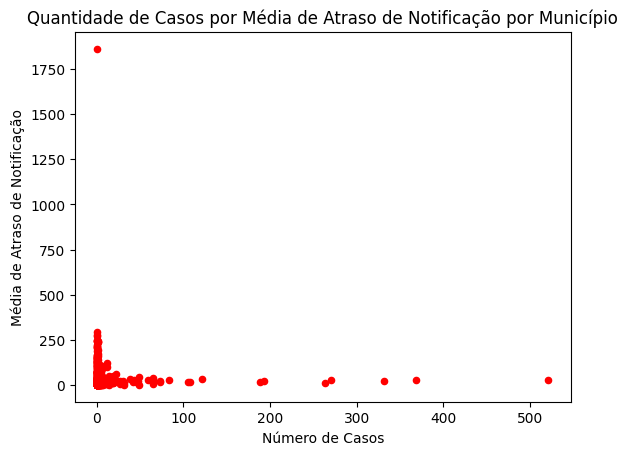

In [13]:
def questao_10(caminho = "chagas2018.csv"):
    df = pd.read_csv(caminho)
    df = df.astype({"DT_NOTIFIC": str, "DT_SIN_PRI": str}).copy()
    df["DT_NOTIFICACAO"] = pd.to_datetime(df["DT_NOTIFIC"])
    df["DT_SINTOMAS"] = pd.to_datetime(df["DT_SIN_PRI"])
    df["ATRASO_NOT"] = (df["DT_NOTIFICACAO"] - df["DT_SINTOMAS"]).dt.days
    media_atraso_mun = df.groupby(["ID_MUNICIP"])["ATRASO_NOT"].mean()
    media_atraso_mun_df = media_atraso_mun.to_frame().reset_index()
    casos_por_municipio = df["ID_MUNICIP"].value_counts().to_frame(name = "NUM_CASOS").rename_axis("ID_MUNICIP").reset_index()
    dataframe_plot = pd.merge(media_atraso_mun_df, casos_por_municipio, on = "ID_MUNICIP")
    dataframe_plot.plot.scatter(
        x="NUM_CASOS",
        y="ATRASO_NOT",
        title="Quantidade de Casos por Média de Atraso de Notificação por Município",
        xlabel="Número de Casos",
        ylabel = "Média de Atraso de Notificação",
        color="red"
    )
    return media_atraso_mun

a2.questao_10()

Esta função possui dois objetivos: retornar uma série do pandas contendo a média de atraso entre o dia em que os sintomas foram apresentados e o dia em que o caso foi notificado por município e gerar um gráfico no qual é possível analisar a quantidade de dias de atraso por número de casos.

Primeiro, é feita a coluna com os atrasos de notificação. Usando essa coluna, o método `mean` e o método `groupby`, assim como na questão anterior, é criada uma série (retornada no final da função) contendo a quantidade média de atraso por município.

Uma cópia da série criada anteriormente é feita, porém no formato `DataFrame`. Um outro dataframe contendo a quantidade de casos por munícipio é criado para que enfim os dois possam ser mesclados em um só usando a função `merge`. Esse dataframe será usado na criação do gráfico.
Para o desenvolvimento do gráfico utiliza-se o método `plot.scatter()`, passando como argumentos as colunas a serem utilizadas para os eixos *x* e *y*, informações de como estes devem aparecer no gráfico, título do gráfico, e cor dos glifos. Esse método exibe automaticamente o gráfico, não sendo necessário nenhum retorno além da série pedida na questão.